# Saxena Carbon Database 
Required system packages and initialization

In [1]:
import pandas as pd
import numpy as np
import sympy as sym
import os
import thermoengine

import importlib
sym.init_printing()


import matplotlib.pyplot  as plt
from fuzzywuzzy import fuzz
# python-Levenshtein

# Create coder module for pure phase using Berman Std State

In [2]:
%run core.ipynb

In [3]:
%run Saxena-std-state-model.ipynb

In [4]:
def Saxena_params(Phase='Name', Formula='', 
                  H_TrPr=-1e6, S_TrPr=1e2, V_TrPr=3,
                  a_cp=100, b_cp=-1.0e-2, c_cp=3.0e6, d_cp=1.0e-6,
                  e_cp=0.0, g_cp=-1.0e3, h_cp=0.0,
                  alpha=1.0E-5, K=100.0, K_P=4.0):
    
    param_dict = {
        'Phase': Phase, 'Formula': Formula,
        'T_r': 298.15, 'P_r': 1.0,
        'H_TrPr': H_TrPr, 'S_TrPr': S_TrPr, 'V_TrPr': V_TrPr,
        'a_cp': a_cp, 'b_cp': b_cp, 'c_cp': c_cp, 'd_cp': d_cp, 
        'e_cp':e_cp, 'g_cp':g_cp, 'h_cp':h_cp,
        'alpha':alpha, 'K':K, 'K_P':K_P}
    return param_dict

In [5]:
phase_params = {}

In [6]:
lookup_phase_info('diamond')

Abbrev     Name Formula Parent
54    Dia  Diamond       C    NaN

In [7]:
phase_params['Dia'] = Saxena_params(
    Phase='Diamond', Formula='C(1)',
    H_TrPr=1900.0, S_TrPr=2.38, V_TrPr=0.3417,
    a_cp=98.45, b_cp=-3.655e-2, c_cp=1.217e6, d_cp=1.098e-5,
    e_cp=0.0, g_cp=-1.659e3, h_cp=0.0,
    alpha=0.2243e-4, K=444.0*1e4, K_P=1.9)

In [8]:
lookup_phase_info('graphite')

Abbrev      Name Formula Parent
87     Gr  Graphite       C    NaN

In [9]:
phase_params['Gr'] = Saxena_params(
    Phase='Graphite', Formula='C(1)',
    H_TrPr=0.0, S_TrPr=5.74, V_TrPr=0.5298,
    a_cp=60.86, b_cp=-1.024e-2, c_cp=7.139e5, d_cp=1.669e-6,
    e_cp=0.0, g_cp=-9.922e2, h_cp=0.0,
    alpha=0.3460e-4, K=33.8*1e4, K_P=8.9)

In [10]:
modelDB = make_custom_database('saxena', phase_params)

/Users/aswolf/Documents/projects/ENKI/ThermoEngine/Notebooks/Carbonated-Mantle/working
Creating (once only) generic fast model code file string
Creating (once only) generic model calib code template include file string
Creating (once only) generic model calib code template code file string
Creating (once only) generic calib model code file string
Creating include file ...
... done!
Creating code file ...
... done
Writing include file to working directory ...
Writing code file to working directory ...
Writing pyxbld file to working directory ...
writing pyx file to working directory ...
Compiling code and Python bindings ...
Success! Import the module named  saxena
Creating include file ...
... done!
Creating code file ...
... done
Writing include file to working directory ...
Writing code file to working directory ...
Writing pyxbld file to working directory ...
writing pyx file to working directory ...
Compiling code and Python bindings ...
Success! Import the module named  saxena
/Us

In [11]:
display(modelDB.phase_info)
Dia = modelDB.get_phase('Dia')
Gr = modelDB.get_phase('Gr')

abbrev phase_name formula phase_type endmember_num
0    Liq     Liquid           solution            15
1    Dia    Diamond       C       pure             1
2     Gr   Graphite       C       pure             1
3    H2O      Water     H2O       pure             1

In [12]:
Dia.volume(298.15,1.0)

In [13]:
Gr.volume(298.15,1)

In [14]:
# Dia.param_names

In [15]:
# Dia.get_param_values(param_names=Dia.param_names)

In [16]:
Dia.entropy(298.15,1.0)

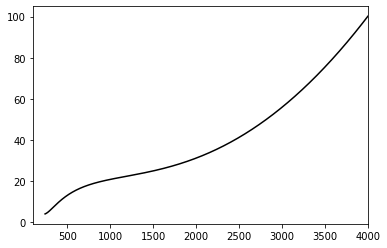

In [23]:

T= np.linspace(240, 4000.0,2001)
Cp = Dia.heat_capacity(T, 1.0)

plt.figure()
plt.plot(T, Cp, 'k-')
plt.xlim(100,4000)

In [24]:
rxn = modelDB.get_rxn(['Gr','Dia'], [0,0], [-1, +1])

In [25]:
# rxn.affinity(298.15, 1)
rxn.affinity(298.15, 1)

array([-2901.784])

In [20]:
from scipy import optimize

In [21]:
P = 3e4
P = np.linspace(1, 60e4,101)
Tlims = [10, 2500]

Tbnd = np.tile(np.nan, P.shape)

for ind, iP in enumerate(P):
    fun = lambda T, P=iP: rxn.affinity(T, P)
    try:
        Tbnd[ind]=optimize.brentq(fun, Tlims[0], Tlims[1])
    except:
        continue

In [22]:
plt.figure()
plt.plot(P/1e4, Tbnd, 'k-')

plt.xlabel('Press. [GPa]')
plt.ylabel('Temp. [K]')

plt.text(40, 500,'Diamond')
plt.text(20, 2000,'Graphite')

Text(20, 2000, 'Graphite')

ValueError: Image size of 12286x395408 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

In [129]:
rxn.affinity(500, 30e4)

array([3429.92227143])

In [99]:
rxn.affinity(300, .5e9)

array([959706.97685682])

In [100]:

rxn.affinity(35, 1)
rxn.affinity(40, 1e3)
rxn.affinity(45, 1e4)
rxn.affinity(90, 5e4)
rxn.affinity(90, 1e5)

array([-22.04912614])

In [101]:
import matplotlib.pyplot as plt

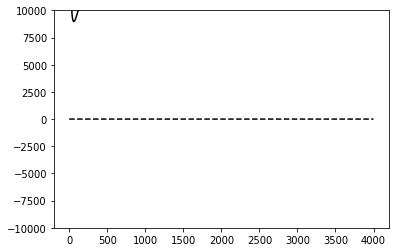

In [29]:
P = 1.0
P = 1e3
# P = 3e3
# P = 1e4
# P = 3e4
P = 10.0e4
# P = 30.0e4
# P = 50.0e4
T = np.linspace(0.1, 4000, 2001)
plt.figure()
plt.plot(T, rxn.affinity(T, P), 'k-')
plt.plot(T, 0*T, 'k--')
plt.ylim(-1e4, +1e4)
P

In [67]:

rxn.trace_boundary(Plims=[1,1e4], init_guess=35.0)

RuntimeError: Failed to converge after 50 iterations, value is [nan].

In [64]:
# rxn.trace_boundary(Plims=[1,1e6], init_guess=3000.0)
# rxn.trace_boundary(Tlims=[300,1000])

In [19]:
thermoengine.phases.FixedRxnSet?

Init signature: thermoengine.phases.FixedRxnSet(phase_symbols, endmember_ids, rxn_coefs, phases_dict, T, P, mols)
Docstring:      <no docstring>
File:           ~/anaconda/envs/py36/lib/python3.6/site-packages/thermoengine/phases.py
Type:           type


In [14]:
Dia = modelDB.get_phase('Dia')

In [18]:
Dia.chem_potential(300.0, 30e3)

In [17]:
import dill

In [18]:
Cal = modelDB.get_phase('Cal')

In [28]:
output = {}
output['Cal'] = Cal

In [29]:
with open('test.pkl','wb') as file:
    dill.dump(output, file)